### Multiprocessing - test

https://www.kaggle.com/roshansharma/ltfs-loan-default-prediction

In [153]:
import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  4


### NOTE: Preprocessing template. 

Why use Pool() and not Process()?

https://towardsdatascience.com/speed-up-your-algorithms-part-3-parallelization-4d95c0888748

In [154]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [155]:
# Function to crate a figure and get instance of Axis.
def axex(size):
    fig = plt.figure(figsize=(size[0],size[1])) # define plot area
    ax = fig.gca() # define axis  
    return ax

In [156]:
loan_data = pd.read_csv('../Hackathon/Data/train.csv',low_memory=False)
# loan_data = pd.read_csv('../input/train.csv')

In [ ]:
loan_data.describe().T

In [ ]:
loan_data.info()

In [ ]:
loan_data.head()

In [ ]:
#  Count of unique member id
len(loan_data['UniqueID'].value_counts())

In [ ]:
type(loan_data['Date.of.Birth'][0])

In [ ]:
# loan_data['loan_amnt'].isnull().sum()

# Function to find sum and percent of missing values for each column.
# Remove the one's that have no missing values.

def missing_values(df):
#     Sum null values. Then divide by the total occurrence
    sum = (df == 0).sum() 
    percent = (df == 0).sum()/len(df)*100
    missing_stats = pd.concat([sum, percent], axis=1).rename(
        columns = {
            0: 'Number',
            1: 'Percent'
        }
    )
#   drop all rows that are equal to 0.
    missing_stats = missing_stats[missing_stats.iloc[:,1] != 0]
    missing_stats.reset_index(inplace=True)
    missing_stats.sort_values('Percent', inplace=True)
    
    return missing_stats


In [ ]:
missing_values(loan_data)

In [ ]:
#  Removing columns with more than 70% of missing data.
# Get a threshold of what is 30% 
# print(loan_data.count())

# temp = [i for i in loan_data.count()<887379 *0.30]
# loan_data.drop(loan_data.columns[temp],axis=1,inplace=True)

# EDA

## Loan data vs...

In [ ]:
ax = axex([10,10])

# Average annual income plot
loan_data[['loan_default', 'Current_pincode_ID']].groupby(['Current_pincode_ID']).sum().plot(ax = ax)

## Data distribution

LTV vs distribution
ltv vs amount
LD of salaried and self_employed

In [ ]:
def univariate(df,col,vartype,hue =None, fig_size=None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(y=col, x="loan_default",ax=ax[1], data=df,hue=hue)
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = (19, 6)
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                if p.get_height() > 0:
                    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.xticks(rotation = 45)    
    plt.show()

In [ ]:
temp = pd.Series(data = 'hue')

### Continuous variables

In [ ]:
# dibursed_amount
univariate(df=loan_data,col='disbursed_amount',vartype=0)

In [ ]:
# loan_data.loc[(loan_data['disbursed_amount'] > 180000)]['loan_default']

loan_data.disbursed_amount.describe()

In [ ]:
loan_data.loc[(loan_data['disbursed_amount'] > 100000) &\
              (loan_data['loan_default'] == 0)]['loan_default'].count()

__Remove rows containing anomalies (amt > 1lk)? what do these anomalies mean?__

In [ ]:
univariate(df=loan_data,col='asset_cost',vartype=0)

__drop asset_cost > 1lkh?__

In [ ]:
# LTV
univariate(df=loan_data,col='ltv',vartype=0, hue='Employment.Type')

In [ ]:
# Distribution of LTV based on loan_defaults.

fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("ltv non defaulters")
sns.distplot(loan_data[loan_data['loan_default'] == 0]['ltv'], ax=ax[0])
ax[1].set_title("ltv defaulters")
sns.distplot(loan_data[loan_data['loan_default'] == 1]['ltv'], ax=ax[1])


In [ ]:
loan_data.ltv.describe()

In [ ]:
#performing log transformations on disbursed amount, ltv, and asset cost

loan_data['disbursed_amount'] = np.log1p(loan_data['disbursed_amount'])
loan_data['ltv'] = np.log1p(loan_data['ltv'])
loan_data['asset_cost'] = np.log1p(loan_data['asset_cost'])

# univariate(df=loan_data,col='disbursed_amount',vartype=0)
# univariate(df=loan_data,col='asset_cost',vartype=0)
# univariate(df=loan_data,col='ltv',vartype=0)
plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(loan_data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(loan_data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(loan_data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

In [ ]:
len(loan_data.loc[(loan_data['ltv'] < 40) & (loan_data['loan_default'] == 1)])

# Lower the ltv == more money with self.

In [ ]:
# distribution of cns score
univariate(df=loan_data,col='PERFORM_CNS.SCORE',vartype=0)

In [ ]:
loan_data['PERFORM_CNS.SCORE'].describe()

In [ ]:
# Default and no credit rating score
x = len(loan_data.loc[(loan_data['PERFORM_CNS.SCORE'] == 0) &\
              (loan_data['loan_default'] == 1)])

y = len(loan_data.loc[(loan_data['PERFORM_CNS.SCORE'] == 0)])

# percent defaulted with no CNS score.
print(x/y)

In [ ]:
len(loan_data[(loan_data['loan_default'] == 1) & (loan_data['PRIMARY.INSTAL.AMT'] > 0)])
print(len(loan_data[(loan_data['PRIMARY.INSTAL.AMT'] > 0)]))

In [ ]:
# distribution of EMI amount
# univariate(df=loan_data,col='PRIMARY.INSTAL.AMT',vartype=0)
ax = axex([10,10])
loan_data['PRIMARY.INSTAL.AMT'].plot.hist(ax=ax)

### Categorical Variables

In [ ]:
len(loan_data)

In [ ]:
print(loan_data['loan_default'].value_counts())
print(50611/182543)

In [ ]:
# Employment type count plot
univariate(df=loan_data,col='Employment.Type',vartype=1)


In [ ]:
univariate(df=loan_data[(loan_data['Employment.Type'] == 'Salaried')],col='loan_default',vartype=1)

In [ ]:
19910/77948

In [ ]:
univariate(df=loan_data[(loan_data['Employment.Type'] == 'Self employed')],col='loan_default',vartype=1)

In [ ]:
29057/98578

In [ ]:
# Count of loan applicant from each state
univariate(df=loan_data,col='State_ID',vartype=1)

In [ ]:
# LD vs Sate
univariate(df=loan_data,col='State_ID',vartype=1, hue='loan_default')


In [ ]:
# Count of instances per manufacturer
univariate(df=loan_data,col='manufacturer_id',vartype=1)

In [ ]:
len(loan_data.loc[(loan_data['manufacturer_id'] == 152) |\
              (loan_data['manufacturer_id'] == 153) |\
              (loan_data['manufacturer_id'] == 156)
             ])

Drop manu_id 152, 153, 156 ? total == 19 

In [ ]:
loan_data['manufacturer_id'].value_counts().index

In [ ]:
loan_data.loc[(loan_data['manufacturer_id'] == 153) & (loan_data['loan_default']==1)]['loan_default']


In [ ]:
univariate(df=loan_data,col='manufacturer_id',vartype=1)

In [ ]:
# LD vs manufacturer

'''
    152 and 156 have no defaults. p.get_height() is returning a nan value if value = 0.
    153 has 4 loan_defaults. percentage base is entire df len. therefore 0% for 153 comes 
    after flooring the percent value.
    '''
univariate(df=loan_data,col='manufacturer_id',vartype=1, hue='loan_default')


In [ ]:
# # Count of instances per branch_id
# univariate(df=loan_data,col='branch_id',vartype=1)

# LD grouped by branchid. 

ax = axex([15,10])

loan_data[['loan_default', 'branch_id']].\
    groupby('branch_id').\
    count().\
    plot.bar(ax=ax)


ax.set_title('LD vs Branch')
ax.set_xlabel('Branch')
ax.set_ylabel('LD')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20 ,20)
ax = sns.countplot(data = loan_data, x= 'branch_id', order=loan_data['branch_id'].\
                   value_counts().index,hue = 'loan_default')
for p in ax.patches:
#     
    if p.get_height() > 0:
        ax.annotate('{:1.1f}'.format((p.get_height())),\
                    (p.get_x()+0.05, p.get_height()+20))

__Additional plots__

In [ ]:

# fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(30,8))
# ax[0].set_title('Credit History')
# sns.countplot(loan_data['CREDIT.HISTORY.LENGTH'].head(50))
# plt.xticks(rotation = 45)

# ax[1].set_title('Average Loan Tenure')
# sns.countplot(loan_data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
# plt.xticks(rotation = 45)

# # plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(loan_data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

# univariate(df=loan_data.head(50),col='CREDIT.HISTORY.LENGTH',vartype=1)

In [ ]:
# average.acct.age i.e., average loan tenure

sns.countplot(loan_data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

__Convert credit.history.length to number of months__ 
Should we convert to years??

In [ ]:
# change_to_months(loan_data)

# plt.rcParams['figure.figsize'] = (18, 5)
# sns.countplot(loan_data['cred_hist_len'].head(50))
# plt.title('Credit History')
# plt.xticks(rotation = 45)


In [ ]:
# average.acct.age i.e., average loan tenure

# sns.countplot(loan_data['avg_tenure'].head(50), palette = 'colorblind')
# plt.title('Average Loan Tenure')
# plt.xticks(rotation = 45)

In [ ]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(loan_data['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# loans defaulted in last six months

loan_data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

In [ ]:
univariate(df=loan_data,col='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',vartype=1)

In [ ]:
univariate(df=loan_data,col='NEW.ACCTS.IN.LAST.SIX.MONTHS',vartype=1)

In [ ]:
# checking the bureau score

# plt.rcParams['figure.figsize'] = (15, 5)
# plt.subplot(1, 2, 1)
# sns.distplot(loan_data['PERFORM_CNS.SCORE'], color = 'purple')
# plt.title('Before Log transformations')

# plt.subplot(1, 2, 2)
# loan_data['PERFORM_CNS.SCORE_log'] = np.log1p(loan_data['PERFORM_CNS.SCORE'])
# sns.distplot(loan_data['PERFORM_CNS.SCORE_log'], color = 'maroon')
# plt.title('After Log transformations')

# plt.show()

## Bivariate plots 
__relation of 2 features to the target(categorical type)__ Used to check correlation of the features.

In [ ]:
# sns.relplot(x="asset_cost", y="disbursed_amount", hue="loan_default", data=loan_data)

__Probably confirms removing val > 1lkh based on disbursed_amount and asset_cost distribution__

In [ ]:
# sns.catplot(x="loan_default", y="disbursed_amount", data=loan_data)

In [ ]:
plt.rcParams['figure.figsize'] = (19, 6)
sns.relplot(data =loan_data, x='PRIMARY.INSTAL.AMT', y='disbursed_amount', hue ='loan_default')
plt.title('EMI vs Disbursed Amount')
plt.show()

### Correlation Map

In [ ]:
# loan_correlation = loan_data.corr()
# loan_correlation

In [ ]:
# f, ax = plt.subplots(figsize=(14, 9))
# sns.heatmap(loan_correlation, 
#             xticklabels=loan_correlation.columns.values,
#             yticklabels=loan_correlation.columns.values,annot= True)
# plt.show()

# Feature Engineering


1. Convert PERFORM_CNS.SCORE.DESCRIPTION to buckets (1 == risk, 0 == no data)
2. DisbursalDate to DisbursalMonth??
3. Make buckets for branch_id, manufacturer_id, state_id

### Bucket categorical var

In [ ]:
# loan_data[['State_ID', 'loan_default']].groupby('State_ID','loan_default').sum()
# def bucket(df):

### Changing duration to number of months

In [128]:
loan_data['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [129]:
import re

def pat1(x):
    result = re.search('([0-9]*) [0-9]*', x)
    return int(result.group(1))

def pat2(x):
    result = re.search('[0-9]* ([0-9]*)', x)
    return int(result.group(1))
    
def change_to_months(loan_data):
    loan_data['avg_tenure'] = loan_data['AVERAGE.ACCT.AGE'].str.replace(r'[a-zA-Z]*', '')
    loan_data['cred_hist_len'] = loan_data['CREDIT.HISTORY.LENGTH'].str.replace(r'[a-zA-Z]*', '')
    loan_data['avg_tenure'] = loan_data['avg_tenure'].apply(lambda x: pat1(x)*12 + pat2(x))
    loan_data['cred_hist_len'] = loan_data['cred_hist_len'].apply(lambda x: pat1(x)*12 + pat2(x))
    


### Create age from DOB

In [130]:
def change_to_age(loan_data):
    now = pd.Timestamp('now')
    loan_data['Date.of.Birth'] = pd.to_datetime(loan_data['Date.of.Birth'])
    loan_data['Date.of.Birth'] = loan_data['Date.of.Birth'].where(loan_data['Date.of.Birth'] < now, loan_data['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
    loan_data['age'] = (now - loan_data['Date.of.Birth']).astype('<m8[Y]')

### Convert employment type to numerical format

In [131]:
def change_to_binary(loan_data):
    # 1 - Salaried
    # 0 - Self-employed
    loan_data['Employment.Type'] = loan_data['Employment.Type'].map({'Salaried': 1, 'Self employed' : 0}, na_action='ignore')
    loan_data['Employment.Type'].fillna(-1, inplace = True)

 ### Add na as unemployed

In [132]:

def Na_unemplyed(loan_data):
    loan_data['Employment.Type'].fillna('Unemployed', inplace = True)

### Converting all flags to one feature

In [133]:
def create_traceability(loan_data):
    loan_data['traceability'] = (loan_data['MobileNo_Avl_Flag'] + loan_data['Aadhar_flag'] + loan_data['PAN_flag'] + loan_data['VoterID_flag'] + loan_data['Driving_flag'] + loan_data['Passport_flag']) / 6.0

Should the flags be dropped? Test with model

### Dropping entries of asset_cost > 100000

In [134]:
def drop_asset_cost_outliers(df):
    df = df.drop(df[df['disbursed_amount'] > 100000].index)

### Call functions on datasets

In [157]:
test = pd.read_csv('../Hackathon/Data/test.csv')
# test =  pd.read_csv('../input/test_bqCt9Pv.csv')

change_to_months(loan_data)
change_to_age(loan_data)
change_to_binary(loan_data)
create_traceability(loan_data)
drop_asset_cost_outliers(loan_data)

change_to_months(test)
change_to_age(test)
change_to_binary(test)
create_traceability(test)


In [158]:
loan_data['Employment.Type'].value_counts()
# univariate(df=loan_data, col='traceability', vartype=1, hue='loan_default')

 0.0    127635
 1.0     97858
-1.0      7661
Name: Employment.Type, dtype: int64

# Model fitting

In [159]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.model_selection import cross_val_score, cross_val_predict
# # from sklearn import metrics, cross_validation
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

In [160]:
df_model = loan_data.copy(deep=True)
df_test_model = test.copy(deep=True)

In [161]:
df_model.drop([
    'UniqueID',
    'branch_id',
    'supplier_id',
    'manufacturer_id',
    'Current_pincode_ID',
    'VoterID_flag',
    'Aadhar_flag',
    'MobileNo_Avl_Flag',
    'PAN_flag',
    'VoterID_flag',
    'Driving_flag',
    'Passport_flag',
    'Date.of.Birth',
    'AVERAGE.ACCT.AGE',
    'CREDIT.HISTORY.LENGTH',
    'PERFORM_CNS.SCORE.DESCRIPTION',
    'Employee_code_ID',
    'State_ID',
    'DisbursalDate'
], axis=1, inplace=True)

df_test_model.drop([
    'UniqueID',
    'branch_id',
    'supplier_id',
    'manufacturer_id',
    'Current_pincode_ID',
    'VoterID_flag',
    'Aadhar_flag',
    'MobileNo_Avl_Flag',
    'PAN_flag',
    'VoterID_flag',
    'Driving_flag',
    'Passport_flag',
    'Date.of.Birth',
    'AVERAGE.ACCT.AGE',
    'CREDIT.HISTORY.LENGTH',
    'PERFORM_CNS.SCORE.DESCRIPTION',
    'Employee_code_ID',
    'State_ID',
    'DisbursalDate'
], axis=1, inplace=True)


In [162]:
df_model.rename(index=str, columns={"loan_default": "Target"}, inplace=True)
df_model.shape


(233154, 27)

### Balancing - Smote 

In [163]:
# applying SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(df_model.drop('Target',axis=1),df_model['Target'].values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

### Splitting the dataset

In [164]:
# train and valid sets from train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, stratify=y_resample, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Target',axis=1),df_model['Target'],test_size=0.20, stratify=df_model['Target'], random_state=0)
# checking the shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print('test_set', df_test_model.shape)

(186523, 26)
(186523,)
(46631, 26)
(46631,)
test_set (112392, 26)


### Balancing the training dataset as 50-50

In [165]:
# np_y_train = y_train.values
# np_X_train = X_train.values
# total_num_of_ones = int(np.sum(y_train))
# # print(total_num_of_ones)
# zero_counter = 0
# indices_to_remove = []

# for i in range(np_y_train.shape[0]):
#     if np_y_train[i] == 0:
#         if zero_counter < total_num_of_ones:
#             zero_counter += 1
#         else:
#             indices_to_remove.append(i)

# X_train = np.delete(np_X_train, indices_to_remove, axis=0)
# y_train = np.delete(np_y_train, indices_to_remove, axis=0)

In [166]:
# applying standardization

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_set = sc.transform(df_test_model)

/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9815134974931463
Testing Accuarcy:  0.5990649996783256
              precision    recall  f1-score   support

           0       0.81      0.64      0.71     36509
           1       0.26      0.46      0.33     10122

   micro avg       0.60      0.60      0.60     46631
   macro avg       0.54      0.55      0.52     46631
weighted avg       0.69      0.60      0.63     46631



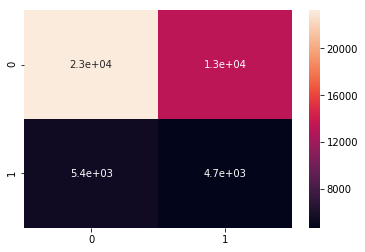

In [93]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print("Training Accuracy: ", model_rf.score(X_train, y_train))
print('Testing Accuarcy: ', model_rf.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)



In [94]:
# getting the avg precision score
apc = average_precision_score(y_test, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.23732596310192883



0 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5927389478883675

1 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.6006421338602124

2 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5900222277105458

3 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5866880711286737

4 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5863176092862435

5 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5940973079772783

6 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5913805877994567

7 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5959496171894295

8 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5901457149913559

9 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.5920207509881423
Training Accuracy:  0.5948529230161278
Testing Accuarcy:  0.5604640689669962
              precision    recall  f1-score   support

           0       0.85      0.54      0.66     36509
           1       0.28      0.65      0.39     10122

   micro avg       0.56      0.56      0.56     46631
   macro avg       0.56      0.59      0.52     46631
weighted avg       0.72      0.56      0.60     46631



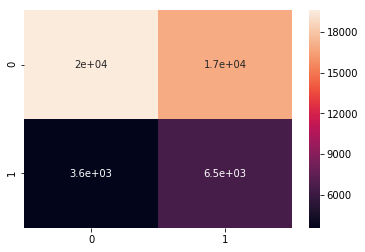

In [168]:
# ADA BOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier()
x_index = [x for x in range(len(X_train))]
y_index = [x for x in range(len(y_train))]

X_train_ada = pd.DataFrame(data=X_train, index=x_index)
y_train_ada = pd.DataFrame(data=y_train, index=y_index)

i = 1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train_ada,y_train_ada):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_ada.loc[train_index], X_train_ada.loc[test_index]
    ytr,yvl = y_train_ada.loc[train_index], y_train_ada.loc[test_index]
    model_ada.fit(xtr, ytr)
    pred=model_ada.predict(xvl)
    print('accuracy_score',accuracy_score(yvl,pred))
    i+=1

y_pred = model_ada.predict(X_test)

print("Training Accuracy: ", model_ada.score(X_train, y_train))
print('Testing Accuarcy: ', model_ada.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [169]:
apc = average_precision_score(y_test, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.257146266958851


Training Accuracy:  0.7926818412150595
Testing Accuarcy:  0.7890383193185242
              precision    recall  f1-score   support

           0       0.71      0.98      0.82     36647
           1       0.96      0.60      0.74     36371

   micro avg       0.79      0.79      0.79     73018
   macro avg       0.84      0.79      0.78     73018
weighted avg       0.84      0.79      0.78     73018



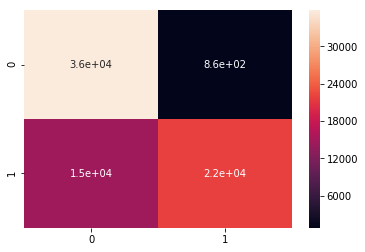

In [38]:
# Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

print("Training Accuracy: ", model_xgb.score(X_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [39]:
apc = average_precision_score(y_test, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.7765207895878448


Training Accuracy:  0.8542496952764425
Testing Accuarcy:  0.8520227889013667
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     36647
           1       1.00      0.70      0.83     36371

   micro avg       0.85      0.85      0.85     73018
   macro avg       0.89      0.85      0.85     73018
weighted avg       0.89      0.85      0.85     73018



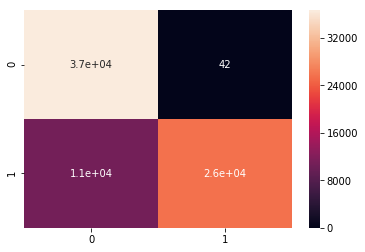

In [40]:
# light boost classifier

from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()
model_lgb.fit(X_train, y_train)

y_pred = model_lgb.predict(X_test)

print("Training Accuracy: ", model_lgb.score(X_train, y_train))
print('Testing Accuarcy: ', model_lgb.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [41]:
# apc = average_precision_score(y_test, y_pred)
# print('Average Precision Score :', apc)

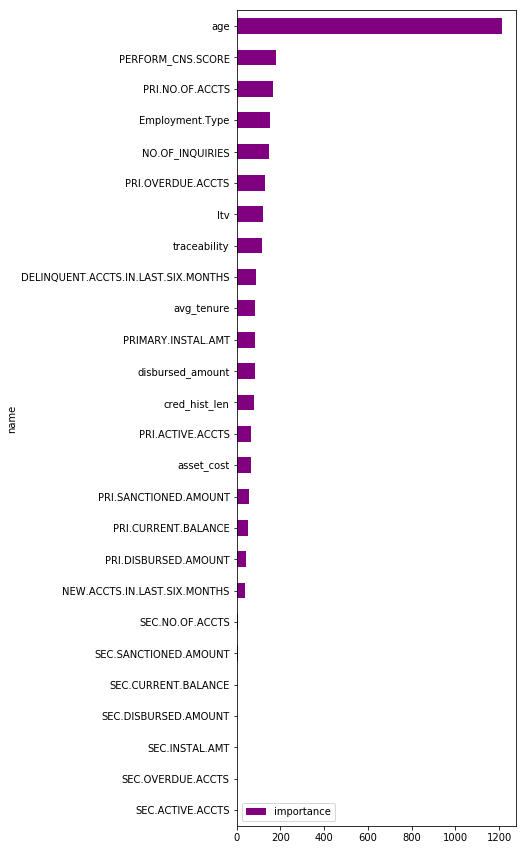

In [42]:
# let's plot the feature importance plot for the lg boost model

feature = pd.DataFrame()
x_train = pd.DataFrame(X_train)

feature['name'] = df_model.drop('Target',axis=1).columns
feature['importance'] = model_lgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

# Predict on test dataset

In [170]:
# let's predict for the tests set

y_pred_rf = model_rf.predict(test_set)
y_pred_ada = model_ada.predict(test_set)
y_pred_xgb = model_xgb.predict(test_set)
y_pred_lgb = model_lgb.predict(test_set)

In [171]:
print(pd.Series(y_pred_rf).value_counts())
print(pd.Series(y_pred_ada).value_counts())
print(pd.Series(y_pred_xgb).value_counts())
print(pd.Series(y_pred_lgb).value_counts())

1    60630
0    51762
dtype: int64


### Submission file

In [172]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'UniqueID': test['UniqueID'],'loan_default': y_pred_ada})

#Visualize the first 5 rows
submission.head()

,UniqueID,loan_default
0,655269,1
1,723482,1
2,758529,1
3,763449,0
4,708663,1


In [173]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = './submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: ./submission.csv


In [ ]:
# def find_rmse(reg): 
#     #   Train test split  
# #     X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Target',axis=1),df_model['Target'],test_size=0.20, stratify=y, random_state=154)
#     X_train = df_model.drop('Target', axis=1)
#     y_train = df_model['Target']
#     X_test = df_test_model.copy(deep=True)
#     X_train.index = X_train.index.astype('int64')
#     y_train.index = y_train.index.astype('int64')
#     X_test.index = X_test.index.astype('int64')
#     # Balancing the dataset
    
# #     np_y_train = y_train.values
# #     np_X_train = X_train.values
# #     total_num_of_ones = int(np.sum(y_train))
# #     # print(total_num_of_ones)
# #     zero_counter = 0
# #     indices_to_remove = []

# #     for i in range(np_y_train.shape[0]):
# #         if np_y_train[i] == 0:
# #             if zero_counter < total_num_of_ones:
# #                 zero_counter += 1
# #             else:
# #                 indices_to_remove.append(i)

# #     X_train = np.delete(np_X_train, indices_to_remove, axis=0)
# #     y_train = np.delete(np_y_train, indices_to_remove, axis=0)

# #     print(len(X_train))
# #     print(len(y_train))
    
#     # Normalising the dataset     
# #     sc = StandardScaler()
# #     X_train = sc.fit_transform(X_train)
# #     X_test=sc.transform(X_test)
    
# #     # Fit the model
# #     reg.fit(X_train, y_train)
    
# #     res = cross_val_score(reg, X_train, y_train, cv=10, scoring='accuracy')
# #     print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    
# #     y_out = reg.predict(X_test)
# # #     print(len(y_out))

#     # Implementing XGBoost and stratified k-fold
    
#     # Converting X_train and y_train to a DF
# #     X_train = pd.DataFrame(X_train)
# #     y_train = pd.DataFrame(y_train)
    
#     param_grid = [{'min_child_weight': np.arange(0.1, 10.1, 0.1)}]
#     i=1
#     kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
#     for train_index,test_index in kf.split(X_train,y_train):
#         print('\n{} of kfold {}'.format(i,kf.n_splits))
#         xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
#         ytr,yvl = y_train[train_index],y_train[test_index]
#         model = GridSearchCV(XGBClassifier(n_estimators=10, n_jobs=4), param_grid, cv=10, scoring= 'f1',iid=True)
#         model.fit(xtr, ytr)
#         print (model.best_params_)
#         pred=model.predict(X_test)
#         print('accuracy_score',accuracy_score(yvl,pred))
#         i+=1
    
#     y_out = predict(X_test)
#     op_df = pd.DataFrame({'UniqueID': test['UniqueID'], 'loan_default': y_out})
#     print(op_df['loan_default'].value_counts())
#     op_df.to_csv(path_or_buf='./rand_for.csv', index=False, index_label='UniqueID')
# #     print('Accuracy score: ')
# #     print(reg.score(X_test, y_test))

# #     error = np.sqrt(mean_squared_error(y_test, y_out))
                                
# #     print(str(error)+ repr(reg)[0:4]) #using repr to get initials of the name of the classifier that this run used

In [ ]:
# from multiprocessing import Pool

# #Add imported classes of classification models to be used.
# regressors_list = [LogisticRegression(), RandomForestClassifier()] 
# pool = Pool(1)
# pool.map(find_rmse,regressors_list)
# pool.close()
# pool.join()